In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2020-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2020-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2020-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2020-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2020-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Automated EDA using pandas_profiling

In [4]:
import pandas_profiling as pf

In [5]:
 pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Mannual EDA  and Feature Engineering

In [6]:
# checking the shape of df
df.shape

(10683, 11)

In [7]:
#checking the data types of df
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [8]:
#checking for missing values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Let's convert Date_of_Journey to datetime datatype

In [10]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2020-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2020-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2020-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [11]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [12]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2020-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [13]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

#### Let's convert Dep_time to datetime datatype

In [14]:
#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [15]:
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

#### Let's convert  Arrival_Time to datetime datatype

In [16]:
#covert to datetime

df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [17]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

#### Let's convert  Duration to datetime datatype

In [18]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [19]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [20]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


#### Count of Airlines

In [21]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

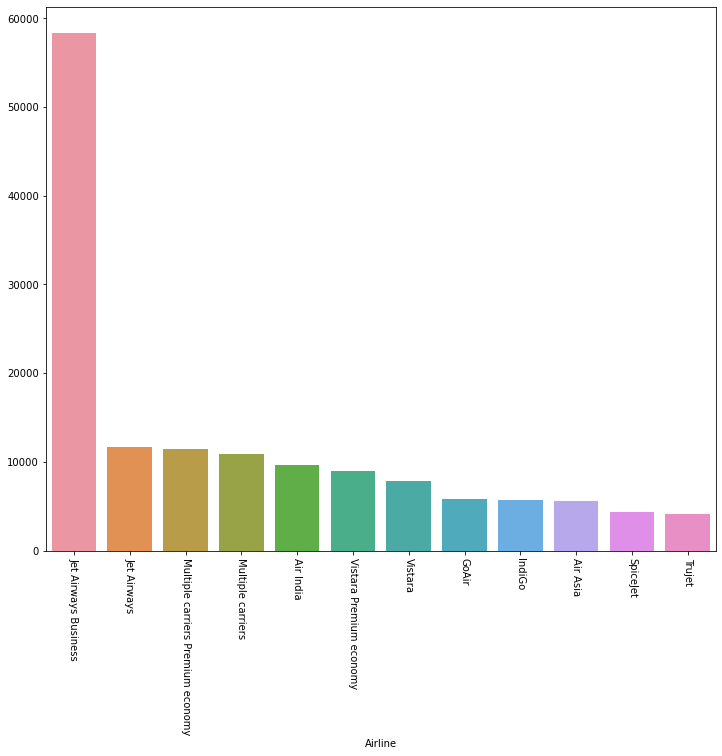

In [22]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

#### Jet Airways Business has the highest price with Trujet having the lowest

<function matplotlib.pyplot.show(*args, **kw)>

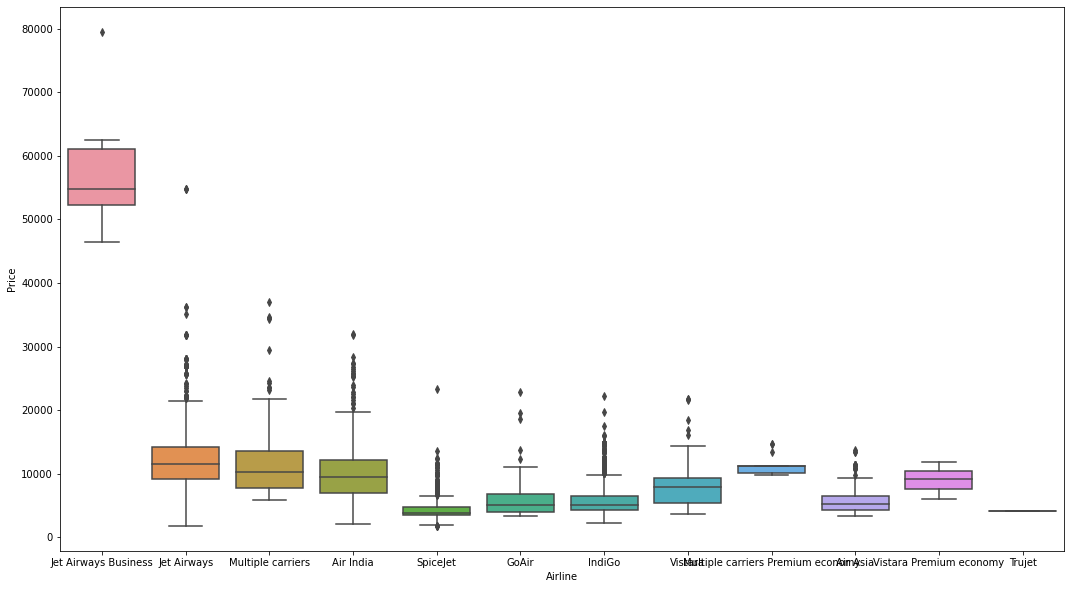

In [23]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

#### Average Price based on number of stops

In [24]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

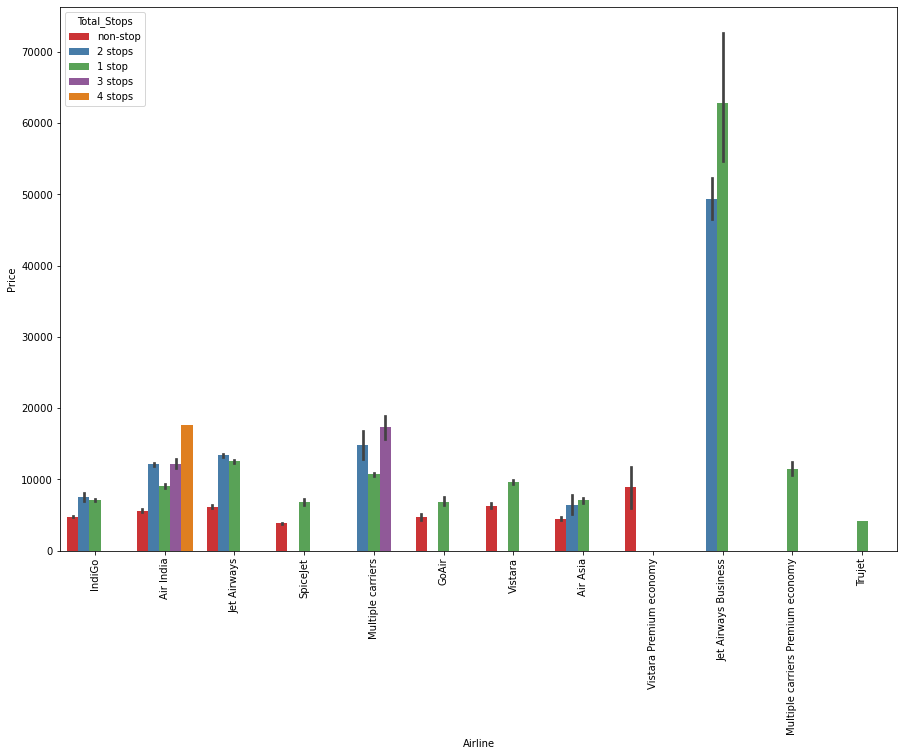

In [25]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### One stop and two stops Jet Airways Business is having the highest price

In [26]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

##### Source vs Price

<function matplotlib.pyplot.show(*args, **kw)>

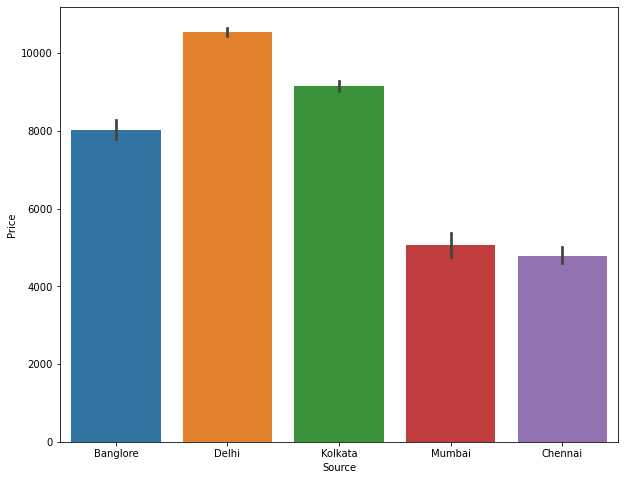

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

#### Destination vs Price

In [28]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

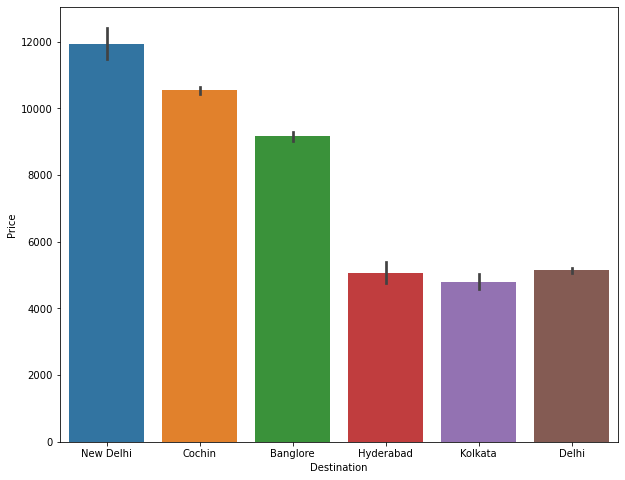

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [30]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [31]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

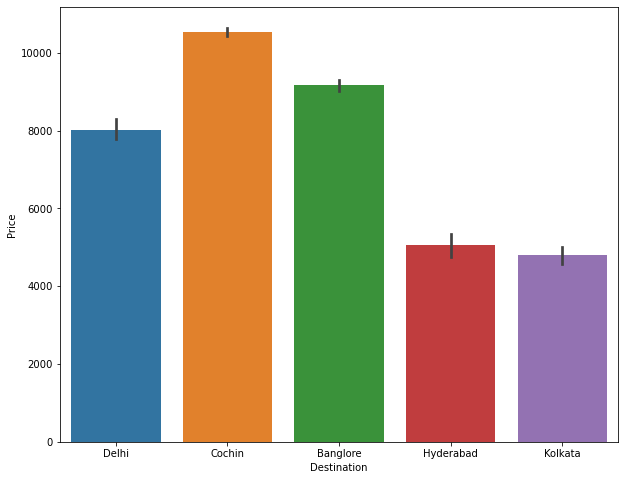

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [33]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

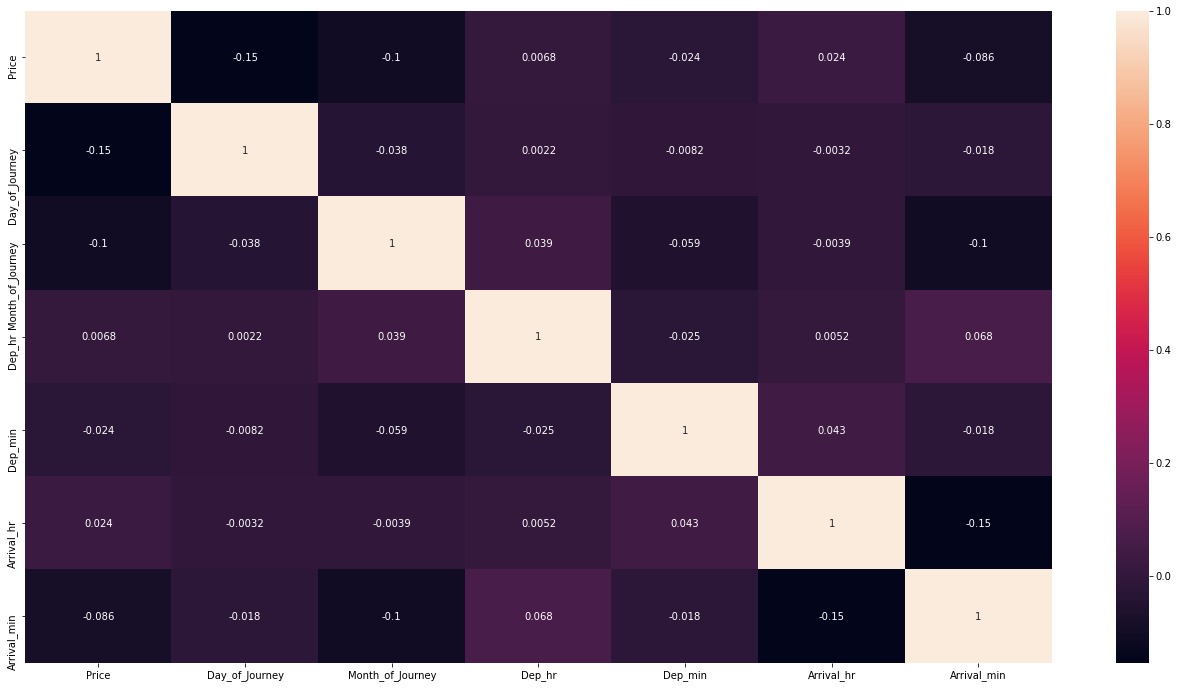

In [34]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

#### The features are less correlated which is a good thing for us to avoid Multicollinearity

#### Apply Onehot Encoding on the categorical variables

In [35]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
print(df['Source'].value_counts())
print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [36]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [37]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [38]:
df.shape

(10682, 31)

### Test Data

In [39]:
df_test=pd.read_excel("Test_set.xlsx")

In [40]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2020-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2020-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2020-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2020-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2020-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### Let's Perform that same steps as we did for train data earlier

In [41]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [42]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [43]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [44]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [45]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [46]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,9,6,9,25,4,25,19,00


### Model Building and Hyperparameter Tuning

#### ExtraTreesRegressor

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

#### Future Importance

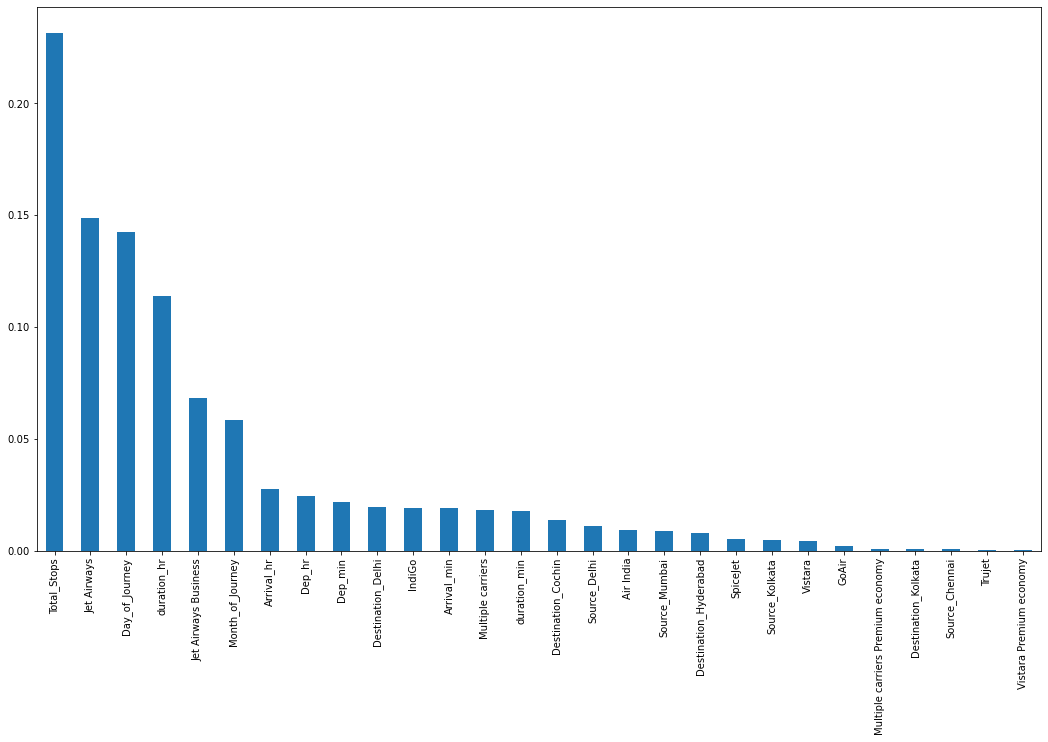

In [50]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [51]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [52]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7650515874071093

#### Hyperparameter

In [53]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

<IPython.core.display.Javascript object>

In [54]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [55]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12378.2075005 ,  4300.48387827,  6249.33943045, ...,
       11400.21200574, 10664.35672521,  8829.82592504])

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1155.1201366204455
MSE 3778554.0434843106


In [57]:
r2_score(y_test,rf_pred)

0.815982576709114

In [58]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4496.7059557	total: 134ms	remaining: 2m 14s
1:	learn: 4370.3117681	total: 141ms	remaining: 1m 10s
2:	learn: 4224.7585132	total: 145ms	remaining: 48.2s
3:	learn: 4096.9029810	total: 149ms	remaining: 37.2s
4:	learn: 4001.4789261	total: 154ms	remaining: 30.6s
5:	learn: 3888.0767438	total: 158ms	remaining: 26.1s
6:	learn: 3791.9756788	total: 164ms	remaining: 23.3s
7:	learn: 3689.3520708	total: 170ms	remaining: 21.1s
8:	learn: 3591.9692761	total: 174ms	remaining: 19.2s
9:	learn: 3501.4965995	total: 181ms	remaining: 18s
10:	learn: 3414.6868002	total: 186ms	remaining: 16.7s
11:	learn: 3341.4911559	total: 191ms	remaining: 15.7s
12:	learn: 3271.8647867	total: 197ms	remaining: 15s
13:	learn: 3221.8758335	total: 202ms	remaining: 14.2s
14:	learn: 3154.5086313	total: 208ms	remaining: 13.7s
15:	learn: 3101.5575333	total: 212ms	remaining: 13.1s
16:	learn: 3056.1167700	total: 216ms	remaining: 12.5s
17:	learn: 3012.5728204	total: 221ms	remaining: 12.1s
18:	learn: 

167:	learn: 1931.2022587	total: 952ms	remaining: 4.71s
168:	learn: 1930.4845674	total: 957ms	remaining: 4.71s
169:	learn: 1928.3174891	total: 964ms	remaining: 4.7s
170:	learn: 1926.4740910	total: 969ms	remaining: 4.7s
171:	learn: 1925.9303402	total: 974ms	remaining: 4.69s
172:	learn: 1925.3138309	total: 981ms	remaining: 4.69s
173:	learn: 1922.7037870	total: 987ms	remaining: 4.68s
174:	learn: 1920.4058468	total: 993ms	remaining: 4.68s
175:	learn: 1917.6499494	total: 999ms	remaining: 4.68s
176:	learn: 1915.7128717	total: 1.01s	remaining: 4.69s
177:	learn: 1912.5809934	total: 1.01s	remaining: 4.69s
178:	learn: 1911.7062145	total: 1.02s	remaining: 4.68s
179:	learn: 1910.1015607	total: 1.03s	remaining: 4.67s
180:	learn: 1907.9357868	total: 1.03s	remaining: 4.67s
181:	learn: 1905.9126599	total: 1.04s	remaining: 4.66s
182:	learn: 1904.8156640	total: 1.04s	remaining: 4.65s
183:	learn: 1903.6473624	total: 1.05s	remaining: 4.64s
184:	learn: 1902.3711448	total: 1.05s	remaining: 4.63s
185:	learn: 

343:	learn: 1732.7877216	total: 1.77s	remaining: 3.38s
344:	learn: 1731.8880169	total: 1.77s	remaining: 3.37s
345:	learn: 1731.6834610	total: 1.78s	remaining: 3.36s
346:	learn: 1730.8508993	total: 1.78s	remaining: 3.35s
347:	learn: 1730.1831434	total: 1.79s	remaining: 3.35s
348:	learn: 1728.9726226	total: 1.79s	remaining: 3.35s
349:	learn: 1728.1583707	total: 1.8s	remaining: 3.34s
350:	learn: 1728.0977616	total: 1.8s	remaining: 3.33s
351:	learn: 1727.2116000	total: 1.81s	remaining: 3.33s
352:	learn: 1725.8506711	total: 1.81s	remaining: 3.32s
353:	learn: 1724.8582678	total: 1.82s	remaining: 3.32s
354:	learn: 1723.1908654	total: 1.82s	remaining: 3.31s
355:	learn: 1721.8830621	total: 1.83s	remaining: 3.31s
356:	learn: 1720.5727917	total: 1.83s	remaining: 3.3s
357:	learn: 1718.9731783	total: 1.84s	remaining: 3.29s
358:	learn: 1717.3489684	total: 1.84s	remaining: 3.29s
359:	learn: 1716.0752206	total: 1.84s	remaining: 3.28s
360:	learn: 1714.5359049	total: 1.85s	remaining: 3.27s
361:	learn: 1

497:	learn: 1614.5666508	total: 2.64s	remaining: 2.66s
498:	learn: 1613.1011574	total: 2.65s	remaining: 2.66s
499:	learn: 1612.5990348	total: 2.65s	remaining: 2.65s
500:	learn: 1612.5939115	total: 2.66s	remaining: 2.65s
501:	learn: 1611.0975547	total: 2.66s	remaining: 2.64s
502:	learn: 1609.7252277	total: 2.67s	remaining: 2.64s
503:	learn: 1609.2615746	total: 2.67s	remaining: 2.63s
504:	learn: 1608.1831358	total: 2.68s	remaining: 2.63s
505:	learn: 1607.9091815	total: 2.68s	remaining: 2.62s
506:	learn: 1607.7209829	total: 2.69s	remaining: 2.61s
507:	learn: 1607.3911631	total: 2.69s	remaining: 2.61s
508:	learn: 1606.9440238	total: 2.7s	remaining: 2.6s
509:	learn: 1606.2560698	total: 2.7s	remaining: 2.6s
510:	learn: 1605.5346443	total: 2.71s	remaining: 2.59s
511:	learn: 1604.4244268	total: 2.71s	remaining: 2.58s
512:	learn: 1604.4187495	total: 2.71s	remaining: 2.58s
513:	learn: 1603.8512311	total: 2.72s	remaining: 2.57s
514:	learn: 1602.5315255	total: 2.73s	remaining: 2.57s
515:	learn: 16

672:	learn: 1507.6698581	total: 3.43s	remaining: 1.67s
673:	learn: 1507.6512254	total: 3.43s	remaining: 1.66s
674:	learn: 1506.7529201	total: 3.44s	remaining: 1.65s
675:	learn: 1506.1931893	total: 3.44s	remaining: 1.65s
676:	learn: 1505.7081554	total: 3.44s	remaining: 1.64s
677:	learn: 1505.5966154	total: 3.45s	remaining: 1.64s
678:	learn: 1505.1538681	total: 3.45s	remaining: 1.63s
679:	learn: 1504.5981814	total: 3.46s	remaining: 1.63s
680:	learn: 1504.5958451	total: 3.46s	remaining: 1.62s
681:	learn: 1503.8256875	total: 3.47s	remaining: 1.62s
682:	learn: 1503.0216627	total: 3.47s	remaining: 1.61s
683:	learn: 1502.6910703	total: 3.48s	remaining: 1.61s
684:	learn: 1501.8650633	total: 3.48s	remaining: 1.6s
685:	learn: 1501.0288192	total: 3.49s	remaining: 1.59s
686:	learn: 1500.8968010	total: 3.49s	remaining: 1.59s
687:	learn: 1500.4684372	total: 3.49s	remaining: 1.58s
688:	learn: 1500.0659442	total: 3.5s	remaining: 1.58s
689:	learn: 1499.5848585	total: 3.5s	remaining: 1.57s
690:	learn: 1

823:	learn: 1444.4560522	total: 4.09s	remaining: 873ms
824:	learn: 1444.2931796	total: 4.09s	remaining: 868ms
825:	learn: 1444.2900358	total: 4.1s	remaining: 863ms
826:	learn: 1443.9188636	total: 4.1s	remaining: 858ms
827:	learn: 1443.3984294	total: 4.11s	remaining: 853ms
828:	learn: 1442.9674212	total: 4.11s	remaining: 848ms
829:	learn: 1442.4067672	total: 4.12s	remaining: 843ms
830:	learn: 1442.1566333	total: 4.12s	remaining: 838ms
831:	learn: 1441.5292257	total: 4.13s	remaining: 833ms
832:	learn: 1441.2065301	total: 4.13s	remaining: 829ms
833:	learn: 1440.7600783	total: 4.14s	remaining: 824ms
834:	learn: 1440.3833258	total: 4.14s	remaining: 818ms
835:	learn: 1440.2149183	total: 4.15s	remaining: 813ms
836:	learn: 1439.6044497	total: 4.15s	remaining: 808ms
837:	learn: 1439.4231130	total: 4.16s	remaining: 803ms
838:	learn: 1439.0524176	total: 4.16s	remaining: 798ms
839:	learn: 1438.4081334	total: 4.16s	remaining: 793ms
840:	learn: 1437.8281368	total: 4.17s	remaining: 788ms
841:	learn: 

979:	learn: 1391.7034272	total: 4.79s	remaining: 97.7ms
980:	learn: 1391.3328490	total: 4.79s	remaining: 92.8ms
981:	learn: 1391.0336179	total: 4.8s	remaining: 87.9ms
982:	learn: 1390.8444569	total: 4.8s	remaining: 83ms
983:	learn: 1390.5061531	total: 4.81s	remaining: 78.2ms
984:	learn: 1390.0377166	total: 4.81s	remaining: 73.3ms
985:	learn: 1390.0249867	total: 4.82s	remaining: 68.4ms
986:	learn: 1389.7970467	total: 4.82s	remaining: 63.5ms
987:	learn: 1389.5291312	total: 4.82s	remaining: 58.6ms
988:	learn: 1389.3877834	total: 4.83s	remaining: 53.7ms
989:	learn: 1389.1861288	total: 4.83s	remaining: 48.8ms
990:	learn: 1388.9951001	total: 4.83s	remaining: 43.9ms
991:	learn: 1388.8996306	total: 4.84s	remaining: 39ms
992:	learn: 1388.3823952	total: 4.84s	remaining: 34.1ms
993:	learn: 1388.1547255	total: 4.85s	remaining: 29.3ms
994:	learn: 1387.5829339	total: 4.85s	remaining: 24.4ms
995:	learn: 1387.2811817	total: 4.86s	remaining: 19.5ms
996:	learn: 1387.0519214	total: 4.86s	remaining: 14.6m

In [59]:
cat_pred=cat.predict(X_test)

In [60]:
r2_score(y_test,cat_pred)

0.8277831821767195

In [61]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [62]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [63]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8115187695856503

In [64]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8208237397547502

In [65]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [67]:
# #Use pickle to save our model so that we can use it later

import pickle 
# # Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [68]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [70]:
deploy_df.to_csv('deploy_df.csv')